# Overview

This project is a response to the growing demand for Microsoft to venture into the movie making business. This move will enable Microsoft to tap into a new market while relaying a new service to their consumers. The success of Microsoft's new movie studio is dependent on making well-informed decisions that are data driven. The data driven decisions should propel the company forward with more sales and better customer engagement.

# Business problem

Microsoft aims to establish a presence in the original video content industry, competing with well-established players like Netflix and Warner bros pictures. The primary challenge is to develop a winning strategy for creating content that not only competes effectively but also captivates and retains audiences. To achieve this, Microsoft must set itself apart by making substantial investments in content development, talent acquisition, and marketing. Additionally, it needs to gain a deep understanding of audience preferences and emerging trends. Balancing the expenses of content creation with revenue sources, such as advertising or subscription models, is also critical.

The analysis is structured around three key factors:

Identifying the most prominent and appealing genres to produce content that resonates with viewers.

Investigating the correlation between the duration of a movie and its popularity, helping Microsoft make informed decisions about the length of its content.

Recognizing the best-performing studios in the movie box office, which can provide valuable insights into potential partnerships, acquisitions, or collaboration opportunities.

By addressing these aspects, Microsoft can enhance its ability to compete in the video industry, understand audience preferences, and establish a viable revenue model.

# Data preparation

In [284]:
#loading needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading first data set(Box office mojo)**

In [285]:
movie_gross = pd.read_csv(r'C:\Users\ALLAN\Downloads\bom.movie_gross.csv.gz')
print(movie_gross.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


**Loading second data set(Movie ratings)**

In [286]:
im_movie_ratings = pd.read_csv(r'C:\Users\ALLAN\Downloads\imdb.title.ratings.csv.gz')
print(im_movie_ratings.head())

       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


**Loading third data set(Movie basics)**

In [287]:
im_movie_basics = pd.read_csv(r'C:\Users\ALLAN\Downloads\imdb.title.basics.csv.gz')
print(im_movie_basics.head())

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [288]:
# merge the two datasets (movie_ratings and movie_basics)
merged_dataset = pd.merge(im_movie_basics, im_movie_ratings, on='tconst')
# The two datasets have been merged on a common column tconst.
merged_dataset

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


# Checking the data and datatypes

In [289]:
# Inspect a few random rows of the DataFrame to get a sense of the data's structure and content
merged_dataset.sample(5) 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
27745,tt2664880,Villmark 2,Villmark 2,2015,93.0,Horror,5.3,2123
20048,tt2229407,Tata od formata,Tata od formata,2011,82.0,"Biography,Documentary,Family",9.1,18
653,tt10122504,Rampaat,Rampaat,2019,NaN,Comedy,6.8,8
67618,tt7595528,No Ordinary Sheila,No Ordinary Sheila,2017,98.0,Documentary,9.0,9
47124,tt4591234,Adoptation,Adoptation,2016,89.0,"Comedy,Drama",7.0,25


In [290]:
movie_gross.sample(5) 

,title,studio,domestic_gross,foreign_gross,year
830,Little White Lies,MPI,206000.0,48300000,2012
1106,Alps,KL,16100.0,NaN,2012
416,The Lincoln Lawyer,LGF,58000000.0,17000000,2011
355,The Help,BV,169700000.0,46900000,2011
188,Greenberg,Focus,4200000.0,1900000,2010


In [291]:
merged_dataset.shape # checks for the number of rows and columns

(73856, 8)

In [292]:
movie_gross.shape # checks for the number of rows and columns

(3387, 5)

In [293]:
merged_dataset.columns # prints out the column names

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [294]:
movie_gross.columns # prints out the column names

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [295]:
merged_dataset.info() # checks for the overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [296]:
movie_gross.info() # checks for the overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


put description here

In [297]:
merged_dataset.dtypes # dtype attribute

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [298]:
movie_gross.dtypes # dtype attribute

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [299]:
movie_gross.describe() # check for a statistical summary of the data

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# Data preprocessing and cleaning

We now need to identify and correct or remove incorrect, incomplete, incorrectly formatted,
corrupted, duplicate or irrelevant data within the provided data.

In [300]:
# Display the count of null values in each column
null_values = movie_gross.isnull()
print(null_values.sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [301]:
# Display the count of null values in each column
null_values = merged_dataset.isnull()
print(null_values.sum())

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


In [302]:
percentage_miss = (merged_dataset.isnull().sum() / len(merged_dataset)).sort_values(ascending=False)
missing_data = pd.DataFrame({"Column Name": percentage_miss.index, "Missing Values": merged_dataset.isnull().sum(), "Percentage": percentage_miss * 100}).reset_index(drop=True)
print(missing_data)

       Column Name  Missing Values  Percentage
0  runtime_minutes               0    0.000000
1           genres             804    1.088605
2           tconst               0    0.000000
3    primary_title               0    0.000000
4   original_title               0    0.000000
5       start_year            7620   10.317374
6    averagerating               0    0.000000
7         numvotes               0    0.000000


In [303]:
# Calculate the mode in the genre column to fill the missing values
merged_dataset['genres'].fillna(merged_dataset['genres'].mode()[0], inplace=True)
# Calculate the mean value of the 'Runtime' column to fill the missing values
merged_dataset['runtime_minutes'].fillna(merged_dataset['runtime_minutes'].mean(), inplace=True)

In [304]:
# Display the count of null values in each column to see if all null values have now been replaced
null_values = merged_dataset.isnull()
print(null_values.sum())

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


The results show that there are no more null values in the dataset.

In [305]:
percentage_miss = (movie_gross.isnull().sum() / len(movie_gross)).sort_values(ascending=False)
missing_data = pd.DataFrame({"Column Name": percentage_miss.index, "Missing Values": movie_gross.isnull().sum(), "Percentage": percentage_miss * 100}).reset_index(drop=True)
print(missing_data)

      Column Name  Missing Values  Percentage
0   foreign_gross              28    0.826690
1  domestic_gross            1350   39.858282
2          studio               5    0.147623
3           title               0    0.000000
4            year               0    0.000000


In [306]:
# Calculate the mean value of the 'domestic_gross' and 'foreign_gross' column to fill the missing values
movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].mean(), inplace=True)

In [307]:
# Remove the , from the values in order to change the data type
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')
movie_gross['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [308]:
# Convert 'foreign_gross' column to a numeric data type and handle non-numeric values by converting them to NaN
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

In [309]:
# Fill missing values in the 'foreign_gross' column with the calculated mean of the column
movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].mean(), inplace=True)

In [310]:
# Calculate the mode in the genre column to fill the missing values
movie_gross['studio'].fillna(movie_gross['studio'].mode()[0], inplace=True)

In [311]:
# Display the count of null values in each column to see if all null values have now been replaced
null_values = movie_gross.isnull()
print(null_values.sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


The results show that there are no more null values in the dataset.

In [312]:
#Check for duplicate values in the dataset
movie_gross.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

The results show that there are no duplicate values in the dataset.

In [313]:
#Check for duplicate values in the dataset
merged_dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

The results show that there are no duplicate values in the dataset.

In [318]:
# Filter the DataFrame to include only years above 2018
merged_dataset_filtered = merged_dataset[merged_dataset['start_year'] >= 2018]
merged_dataset_filtered

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.00000,Documentary,7.5,6
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.00000,Drama,4.0,72
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.00000,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00000,"Drama,Family",8.7,136
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,94.65404,Drama,6.6,5


This code filters the merged_dataset to only include movies from 2018 onwards and saves it as
merged_dataset_filtered. Now we have reduced our dataset to 9706 rows and with more recent data only

In [315]:
# Filter the DataFrame to include only years above 2017
movie_gross_filtered = movie_gross[movie_gross['year'] >= 2017]
movie_gross_filtered

,title,studio,domestic_gross,foreign_gross,year
2758,Star Wars: The Last Jedi,BV,620200000.0,7.124000e+08,2017
2759,Beauty and the Beast (2017),BV,504000000.0,7.595000e+08,2017
2760,The Fate of the Furious,Uni.,226000000.0,1.010000e+03,2017
2761,Despicable Me 3,Uni.,264600000.0,7.702000e+08,2017
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,5.576000e+08,2017
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.487281e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.487281e+07,2018
3384,El Pacto,Sony,2500.0,7.487281e+07,2018
3385,The Swan,Synergetic,2400.0,7.487281e+07,2018


# Data analysis and visualization

**1.Determining the best performing studios**

In [324]:
# create a new DataFrame called studio_df with the columns studio, foreign_gross and domest_gross
studio_df = movie_gross_filtered[['studio', 'foreign_gross', 'domestic_gross']]
studio_df

,studio,foreign_gross,domestic_gross
2758,BV,7.124000e+08,620200000.0
2759,BV,7.595000e+08,504000000.0
2760,Uni.,1.010000e+03,226000000.0
2761,Uni.,7.702000e+08,264600000.0
2762,Sony,5.576000e+08,404500000.0
...,...,...,...
3382,Magn.,7.487281e+07,6200.0
3383,FM,7.487281e+07,4800.0
3384,Sony,7.487281e+07,2500.0
3385,Synergetic,7.487281e+07,2400.0


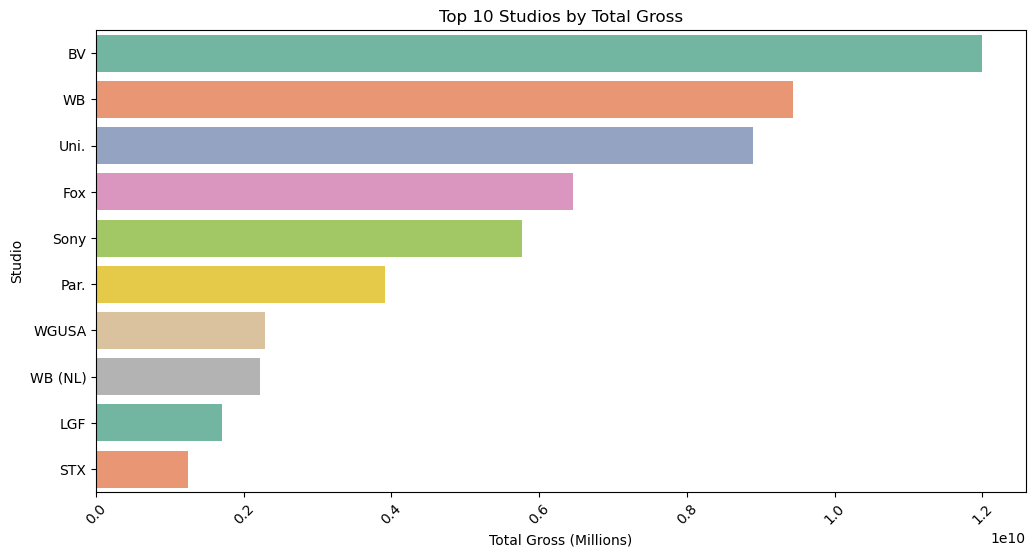

In [365]:
# Create a copy of the DataFrame
studio_df = studio_df.copy()

# Calculate total gross for each studio
studio_df['total_gross'] = studio_df['domestic_gross'] + studio_df['foreign_gross']

# Group by studio and calculate the total gross
studio_totals = studio_df.groupby('studio')['total_gross'].sum().sort_values(ascending=False)

# Select the top 10 studios
top_10_studios = studio_totals.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_studios.values, y=top_10_studios.index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Total Gross (Millions)')
plt.ylabel('Studio')
plt.show()


The top 5 studios in terms of gross income are

1.Buena Vista

2.Warner Bros. Pictures

3.Universal Pictures

4.20th Century Fox

5.Sony Pictures Entertainment (SPE)


**Determining the most prevalent genre**

In [316]:
# Group movies by genre and count them
movie_genre_counts = merged_dataset_filtered['genres'].str.split(',').explode().str.strip().value_counts()

# Display the counts of movies by genre
print(movie_genre_counts)

genres
Drama          4015
Comedy         2339
Documentary    1913
Thriller       1122
Horror          994
Action          905
Romance         783
Crime           556
Adventure       480
Family          382
Mystery         382
Biography       332
Sci-Fi          285
Fantasy         275
Animation       265
History         242
Music           192
Sport           146
War             106
Musical          87
Western          39
News              7
Reality-TV        2
Short             1
Name: count, dtype: int64


This value count will help us identify genres with the highest count
Our next step will be to create a graph in order to visualize which movie genres have the
greatest number of films.

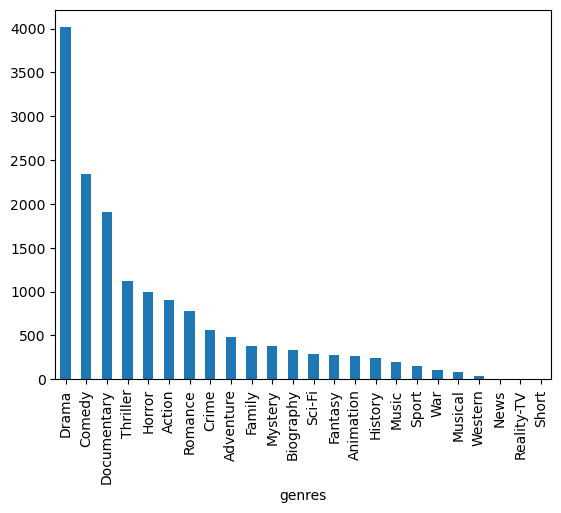

In [319]:
movie_genre_counts = merged_dataset_filtered['genres'].str.split(',').explode().str.strip().value_counts().plot.bar()

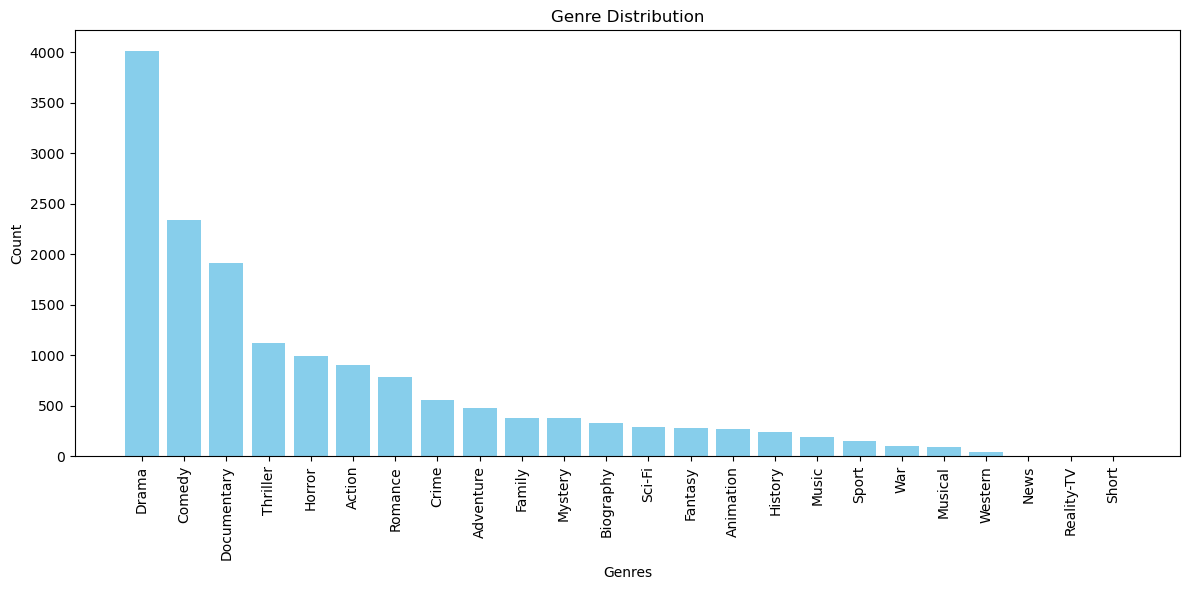

In [346]:
# Sample genre counts data
genres = ['Drama', 'Comedy', 'Documentary', 'Thriller', 'Horror', 'Action', 'Romance',
    'Crime', 'Adventure', 'Family', 'Mystery', 'Biography', 'Sci-Fi', 'Fantasy',
    'Animation', 'History', 'Music', 'Sport', 'War', 'Musical', 'Western',
    'News', 'Reality-TV', 'Short']
genre_counts = [4015, 2339, 1913, 1122, 994, 905, 783, 556, 480, 382, 382, 332, 285, 275,
    265, 242, 192, 146, 106, 87, 39, 7, 2, 1]
# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(genres, genre_counts, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('movie count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


From the graph above we learn that genres with the highest number of movies were:

Drama

Comedy

Documentary

Thriller

Horror

**The Correlation between Movie runtime and number of votes received**

       runtime_minutes       numvotes
count      9706.000000    9706.000000
mean         97.258133    2017.147125
std          23.906031   16835.378721
min           7.000000       5.000000
25%          86.000000      14.000000
50%          94.654040      45.000000
75%         105.000000     220.000000
max         808.000000  670926.000000


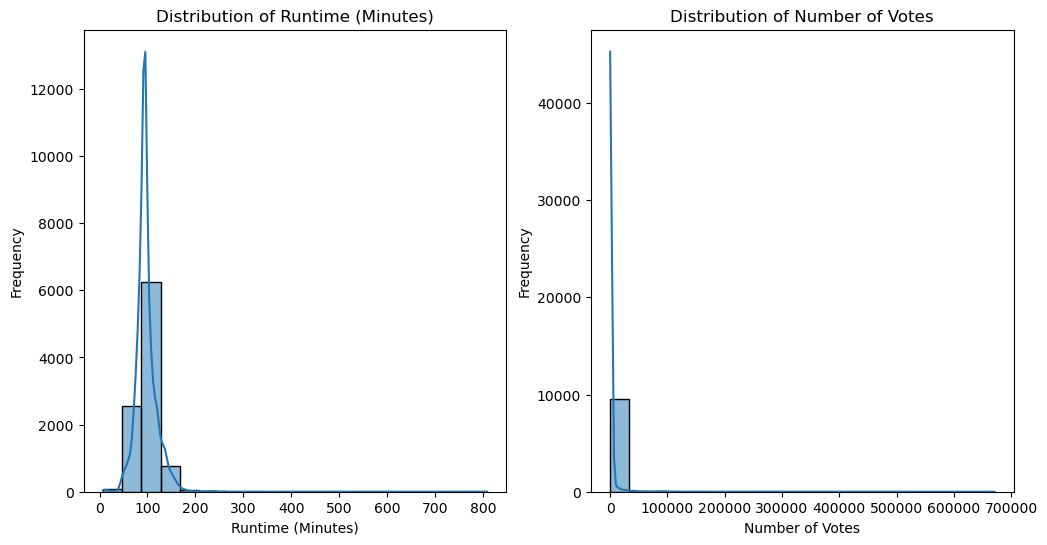

In [361]:
# Calculate summary statistics
print(merged_dataset_filtered[['runtime_minutes', 'numvotes']].describe())

# Visualize the distribution of 'runtime_minutes' and 'numvotes'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_dataset_filtered['runtime_minutes'], kde=True, bins=20)
plt.title('Distribution of Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(merged_dataset_filtered['numvotes'], kde=True, bins=20)
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')

plt.show()


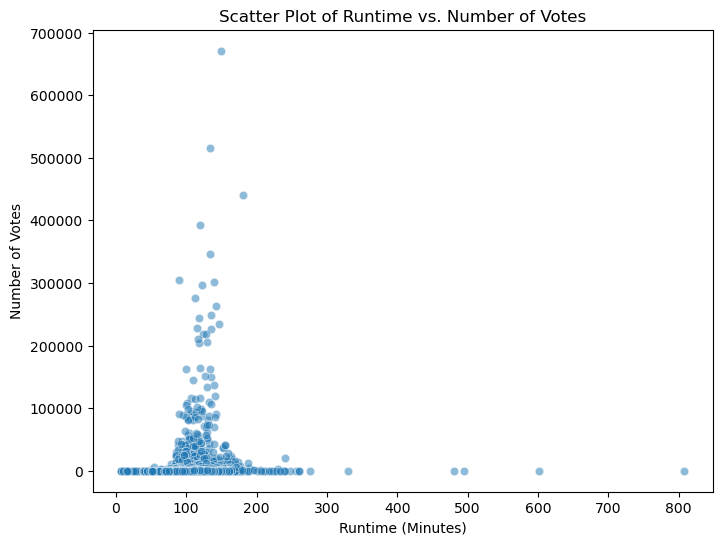

In [362]:
# Create a scatter plot to visualize the relationship between 'runtime_minutes' and 'numvotes'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_dataset_filtered, x='runtime_minutes', y='numvotes', alpha=0.5)
plt.title('Scatter Plot of Runtime vs. Number of Votes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Votes')
plt.show()


In [363]:
correlation = merged_dataset_filtered['runtime_minutes'].corr(merged_dataset_filtered['numvotes'])
print(f'Correlation between Runtime and Number of Votes: {correlation:.2f}')


Correlation between Runtime and Number of Votes: 0.11


with a correlation coefficient of 0.11, there is not a strong relationship between the runtime of movies and the number of votes they receive

# Conclusion

This analysis leads to the following conclusions for the types of films that are the best
performing in the box office:

Genre Popularity:
The analysis shows that the 'Drama' genre has the highest movie count, indicating its popularity among consumers. This information is valuable for content creators and studios looking to produce content that resonates with a broad audience.

Buena Vista's Success:
Buena Vista stands out as the studio with the highest total gross income. This finding suggests that Microsoft could explore partnerships, collaborations, or even consider acquisitions in the film industry. Acquiring or partnering with successful studios like Buena Vista could be a strategic move to enter the film industry with a strong foothold.

Runtime and Votes:
The weak correlation between the runtime of movies and the number of votes received provides flexibility for Microsoft. This indicates that Microsoft can produce content of varying lengths, including short movies or long series. Since 'Drama' is the most popular genre, Microsoft can focus on producing drama content in line with audience preferences.

# Recommendation

Strategic Partnerships and Acquisitions:
Consider strategic partnerships with successful studios and potentially explore acquisition opportunities in the film industry.
Rationale: The analysis identified Buena Vista as a top-performing studio. Partnering with or acquiring studios like Buena Vista can provide Microsoft with a competitive edge, established content libraries, and industry expertise. This strategic move can expedite Microsoft's entry and growth in the film industry.

Content Production Strategy:
Develop a content production strategy that caters to the most popular genre, 'Drama,' while also offering flexibility in content length.
Rationale: 'Drama' is the most popular genre, and the weak correlation between runtime and votes implies flexibility in content creation. Microsoft can focus on producing drama content to align with consumer preferences while diversifying the portfolio with both short films and long series. This approach can maximize audience engagement and satisfaction.

Digital Distribution Platform:
Create a digital distribution platform for movie content to reach a broader audience.
Rationale: As a tech giant, Microsoft has the resources and technical capabilities to develop a digital platform for distributing films. This platform can serve as a one-stop destination for streaming and purchasing movies, making it accessible to a global audience. By leveraging Microsoft's technology expertise, this platform can provide a seamless and engaging viewing experience.